       Country Region        Date  Kilotons of Co2  Metric Tons Per Capita
0  Afghanistan   Asia  01-01-2011           8930.0                    0.31
1  Afghanistan   Asia  01-01-2012           8080.0                    0.27
2  Afghanistan   Asia  01-01-2010           7110.0                    0.25
3  Afghanistan   Asia  01-01-2019           6080.0                    0.16
4  Afghanistan   Asia  01-01-2018           6070.0                    0.17
Null values in each column:
Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64
Mean Squared Error: 609077669651.0189
R^2 Score: -0.03929216605075525


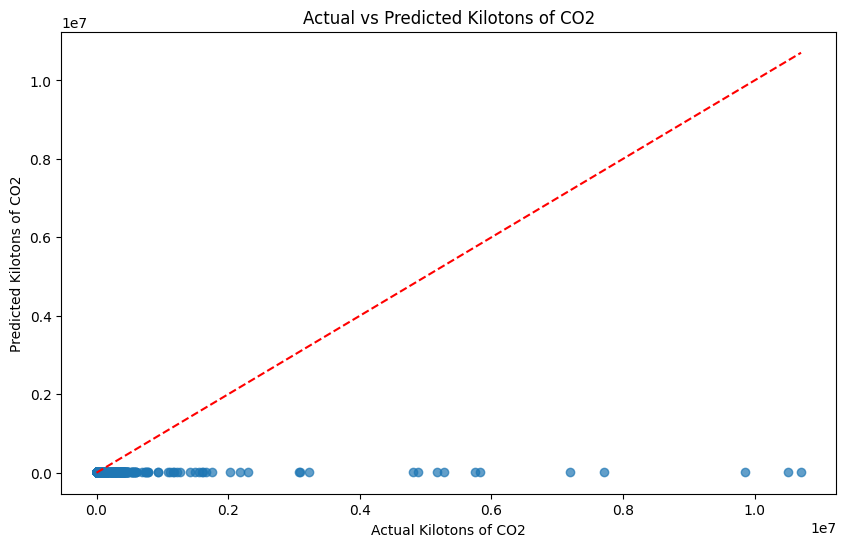

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('CO2.csv')
print(data.head())

# Menambahkan sintax untuk melihat nilai yang NULL
print("Null values in each column:")
print(data.isnull().sum())

# Menambahkan Variabel Encoder untuk menerjemahkan isi dataset
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Date'] = pd.to_datetime(data['Date'])

# splitting data into training and test set
training_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

# Menyiapkan data untuk dikirimkan kepada SVC
x_train = training_set[['Country', 'Metric Tons Per Capita']].values   # data
y_train = training_set['Kilotons of Co2'].values  # target
x_test = test_set[['Country', 'Metric Tons Per Capita']].values  # data
y_test = test_set['Kilotons of Co2'].values  # target

# Merubah fit 
regressor = SVR(kernel='rbf', C=1, gamma='auto')
regressor.fit(x_train, y_train)

# perform prediction on x_test data
y_pred = regressor.predict(x_test)

# menghapus sintax confusion matrix dan accuracy calculated dengan Menghitung Mean Squared Error dan R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Menambahkan Visualisasi: plot nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
plt.xlabel('Actual Kilotons of CO2')
plt.ylabel('Predicted Kilotons of CO2')
plt.title('Actual vs Predicted Kilotons of CO2')
plt.show()